In [22]:
from correction import *
from matplotlib import pyplot as plt
import os
from tqdm import tqdm

## Demo for batch processing

In [23]:
# Batch processing
input_folder = 'input/'

# Grab all jpg, jpeg, png files in the input folder
files = [f for f in os.listdir(input_folder) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# Create the output folder if it does not exist
if not os.path.exists('output'):
    os.makedirs('output')

# Process all files
for file in tqdm(files):
    img = cv2.imread(input_folder + file, 1)
    horizontal_lines, vertical_lines = find_long_ling(img)
    intersection_points = find_rectangle(horizontal_lines, vertical_lines, img.shape[0], img.shape[1])
    corrected_img = perspective_correction(img, intersection_points)
    cv2.imwrite('output/' + file, corrected_img)

100%|██████████| 8/8 [00:01<00:00,  4.52it/s]


## Explanation of each step on one img

In [26]:
img = cv2.imread('input/demo.jpg', 1)

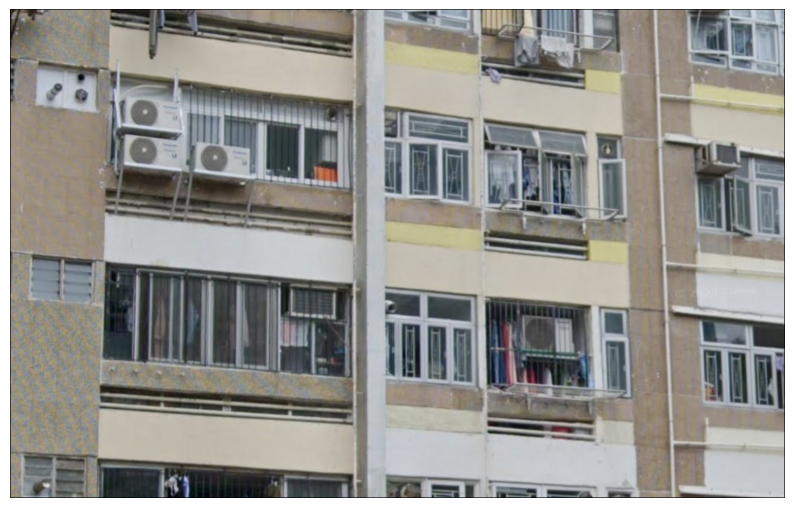

In [27]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

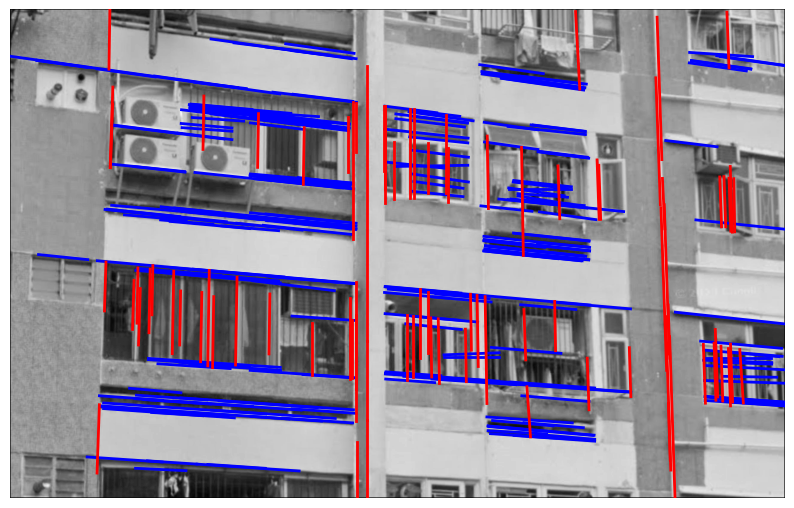

In [28]:
# Find the potential long horizontal and vertical lines
horizontal_lines, vertical_lines = find_long_ling(img)

# Plot the result
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap='gray')

# Draw horizontal lines (blue)
for line in horizontal_lines:
    x1, y1, x2, y2 = line[0]
    plt.plot([x1, x2], [y1, y2], color='blue', linewidth=2)

# Draw vertical lines (red)
for line in vertical_lines:
    x1, y1, x2, y2 = line[0]
    plt.plot([x1, x2], [y1, y2], color='red', linewidth=2)

# Remove axis
plt.axis('off')

plt.show()

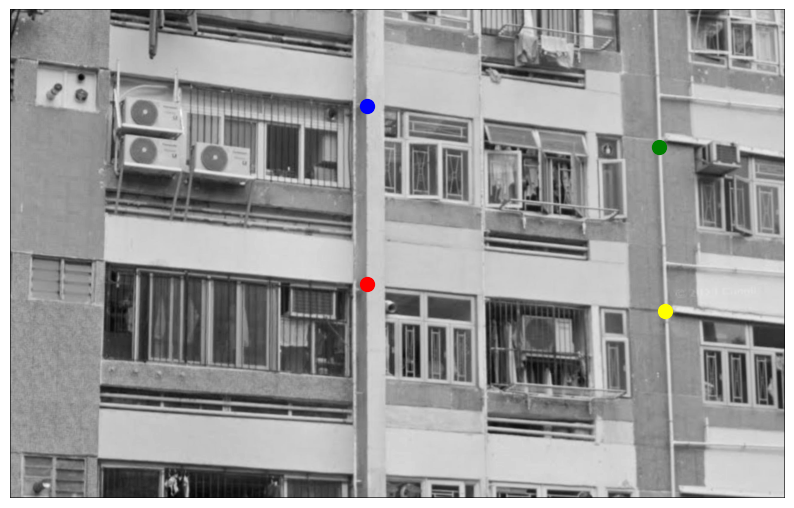

In [29]:
# Find the intersection points
intersection_points = find_rectangle(horizontal_lines, vertical_lines, img.shape[0], img.shape[1])

# Plot the result
p1, p2, p3, p4 = intersection_points
plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap='gray')

# Draw Point1 (blue)
plt.scatter(p1[0], p1[1], color='blue', s=100)

# Draw Point2 (green)
plt.scatter(p2[0], p2[1], color='green', s=100)

# Draw Point3 (red)
plt.scatter(p3[0], p3[1], color='red', s=100)

# Draw Point4 (yellow)
plt.scatter(p4[0], p4[1], color='yellow', s=100)

# Remove axis
plt.axis('off')

plt.show()

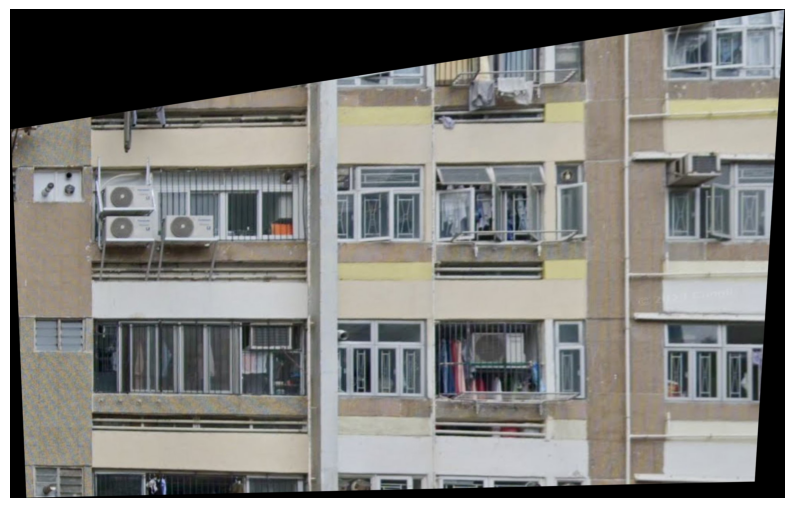

In [30]:
# Correct the perspective
corrected_img = perspective_correction(img, intersection_points)

# Plot the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()